# Imports

In [8]:
import json
import os
import sys
import time
import math
import random
import datetime
from collections import *
import re

from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_pandas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectFwe, mutual_info_classif, univariate_selection 
from sklearn.model_selection import cross_val_predict
#from sklearn.decomposition import PCA, NMF, RandomizedPCA, TruncatedSVD
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
import graphviz

%matplotlib inline


In [9]:
pd.set_option("display.max_columns", 100)

In [10]:
sns_palette = sns.color_palette("Blues", n_colors=1)

# Exploration

## Du jeu de données

In [11]:
def explore_object(obj):
    if isinstance(obj, list):
        return random.choice(obj)
    elif isinstance(obj, dict):
        random_key = random.choice(list(obj.keys()))
        return (random_key, obj[random_key])

In [26]:
# Dataset des films ayant au moins 10,000 votes
with open("../data/IMDB_SCRAPED_DATA.json", "r") as f:
    imdb_data = json.load(f)

In [27]:
len(imdb_data)

7168

In [28]:
explore_object(imdb_data)

('tt0093692',
 {'CRITICS_CRITIC': '49',
  'CRITICS_USER': '122',
  'PRODUCTORS_1': 'Cannon Group',
  'PRODUCTORS_2': 'Golan-Globus Productions',
  'PRODUCTORS_3': 'Warner Bros.',
  'COUNTRIES_1': 'USA',
  'DETAILS_RELEASE_DATE': '13 February 1987 (USA)',
  'LANG_1': 'English',
  'DETAILS_BUDGET': '$25,000,000',
  'DETAILS_GROSS': '$16,057,580',
  '_SYNOPSIS': 'Tough trucker Lincoln Hawk is determined to win back his son and triumph at the world arm wrestling championships.',
  'WRITER_1': 'nm0176684',
  'WRITER_2': 'nm0257168',
  'DIRECTOR_1': 'nm0324875',
  'STAR_1': 'nm0005162',
  'STAR_2': 'nm0086806',
  'STAR_3': 'nm0000230',
  '_METASCORE': None,
  '_STORYLINE': '\nLincoln Hawk (Stallone) is a struggling trucker who arm wrestles on the side to make extra cash while trying to rebuild his life. After the death of his wife, he tries to make amends with his son who he left behind 10 years earlier. Upon their first meeting, his son does not think too highly of him until he enters the W

In [29]:
df = pd.DataFrame.from_dict(imdb_data, orient="index")

In [30]:
df.shape

(7168, 94)

In [31]:
df.head()

CRITICS_CRITIC CRITICS_USER                      PRODUCTORS_1  \
tt0004972             84          334           David W. Griffith Corp.   
tt0006864             72           91         Triangle Film Corporation   
tt0010323            151          202                  Decla-Bioscop AG   
tt0012349             89          126       Charles Chaplin Productions   
tt0013442            244          371  Jofa-Atelier Berlin-Johannisthal   

                          PRODUCTORS_2 PRODUCTORS_3 COUNTRIES_1  \
tt0004972  Epoch Producing Corporation          NaN         USA   
tt0006864               Wark Producing          NaN         USA   
tt0010323                          NaN          NaN     Germany   
tt0012349                          NaN          NaN         USA   
tt0013442              Prana-Film GmbH          NaN     Germany   

                 DETAILS_RELEASE_DATE   LANG_1 LANG_2 LANG_3 LANG_4  \
tt0004972         21 March 1915 (USA)      NaN    NaN    NaN    NaN   
tt0006864        12 May 1919 (France)      NaN    NaN    NaN    NaN   
tt0010323  27 February 1920 (Germany)     None    NaN    NaN    NaN   
tt0012349   9 November 1923 (Germany)  English    NaN    NaN    NaN   
tt0013442           3 June 1929 (USA)   German    NaN    NaN    NaN   

          DETAILS_BUDGET DETAILS_GROSS  \
tt0004972       $100,000   $10,000,000   
tt0006864       $385,907           NaN   
tt0010323        $18,000           NaN   
tt0012349       $250,000    $5,450,000   
tt0013442            NaN           NaN   

                                                   _SYNOPSIS   WRITER_1  \
tt0004972  The Stoneman family finds its friendship with ...  nm0228746   
tt0006864  The story of a poor young woman, separated by ...  nm0000428   
tt0010323  Hypnotist Dr. Caligari uses a somnambulist, Ce...  nm0562346   
tt0012349  The Tramp cares for an abandoned child, but ev...  nm0000122   
tt0013442  Vampire Count Orlok expresses interest in a ne...  nm0831290   

          DIRECTOR_1 DIRECTOR_2     STAR_1     STAR_2     STAR_3  _METASCORE  \
tt0004972  nm0000428        NaN  nm0550615  nm0910400  nm0001273         NaN   
tt0006864  nm0000428        NaN  nm0550615  nm0001273  nm0001196         NaN   
tt0010323  nm0927468        NaN  nm0891998  nm0270415  nm0470328         NaN   
tt0012349  nm0000122        NaN  nm0701012  nm0001067  nm0000122         NaN   
tt0013442  nm0003638        NaN  nm0485146  nm0775659  nm0775180         NaN   

                                                  _STORYLINE  AVERAGERATING  \
tt0004972  \nTwo brothers, Phil and Ted Stoneman, visit t...            6.7   
tt0006864  \nIntolerance and its terrible effects are exa...            8.0   
tt0010323  \nFrancis, a young man, recalls in his memory ...            8.1   
tt0012349  \nThe opening title reads: "A comedy with a sm...            8.3   
tt0013442  \nWisbourg, Germany based estate agent Knock d...            8.0   

          COMPOSER_1 COMPOSER_2 COMPOSER_3 COMPOSER_4  IS_ACTION  IS_ADULT  \
tt0004972        NaN        NaN        NaN        NaN        NaN       NaN   
tt0006864        NaN        NaN        NaN        NaN        NaN       NaN   
tt0010323  nm0005959        NaN        NaN        NaN        NaN       NaN   
tt0012349        NaN        NaN        NaN        NaN        NaN       NaN   
tt0013442  nm0002302        NaN        NaN        NaN        NaN       NaN   

           IS_ADVENTURE  IS_ANIMATION  IS_BIOGRAPHY  IS_COMEDY  IS_CRIME  \
tt0004972           NaN           NaN           NaN        NaN       NaN   
tt0006864           NaN           NaN           NaN        NaN       NaN   
tt0010323           NaN           NaN           NaN        NaN       NaN   
tt0012349           NaN           NaN           NaN        1.0       NaN   
tt0013442           NaN           NaN           NaN        NaN       NaN   

           IS_DOCUMENTARY  IS_DRAMA  IS_FAMILY  IS_FANTASY  IS_FILM-NOIR  \
tt0004972             NaN       1.0        NaN         NaN         

In [10]:
print(sorted(df.columns.tolist()))

['AVERAGERATING', 'AWARDS_NB_OSCAR_NOMINATIONS', 'AWARDS_NB_OSCAR_WON', 'AWARDS_NB_OTHER_NOMINATIONS', 'AWARDS_NB_OTHER_WINS', 'COMPOSER_1', 'COMPOSER_2', 'COMPOSER_3', 'COMPOSER_4', 'COUNTRIES_1', 'COUNTRIES_10', 'COUNTRIES_11', 'COUNTRIES_12', 'COUNTRIES_13', 'COUNTRIES_14', 'COUNTRIES_15', 'COUNTRIES_16', 'COUNTRIES_2', 'COUNTRIES_3', 'COUNTRIES_4', 'COUNTRIES_5', 'COUNTRIES_6', 'COUNTRIES_7', 'COUNTRIES_8', 'COUNTRIES_9', 'CRITICS_CRITIC', 'CRITICS_USER', 'DETAILS_BUDGET', 'DETAILS_GROSS', 'DETAILS_RELEASE_DATE', 'DETAILS_WORLDWIDE_GROSS', 'DIRECTOR_1', 'DIRECTOR_2', 'IS_ACTION', 'IS_ADULT', 'IS_ADVENTURE', 'IS_ANIMATION', 'IS_BIOGRAPHY', 'IS_COMEDY', 'IS_CRIME', 'IS_DOCUMENTARY', 'IS_DRAMA', 'IS_FAMILY', 'IS_FANTASY', 'IS_FILM-NOIR', 'IS_GAME-SHOW', 'IS_HISTORY', 'IS_HORROR', 'IS_MUSIC', 'IS_MUSICAL', 'IS_MYSTERY', 'IS_NEWS', 'IS_REALITY-TV', 'IS_ROMANCE', 'IS_SCI-FI', 'IS_SHORT', 'IS_SPORT', 'IS_TALK-SHOW', 'IS_THRILLER', 'IS_WAR', 'IS_WESTERN', 'LANG_1', 'LANG_10', 'LANG_11', 'L

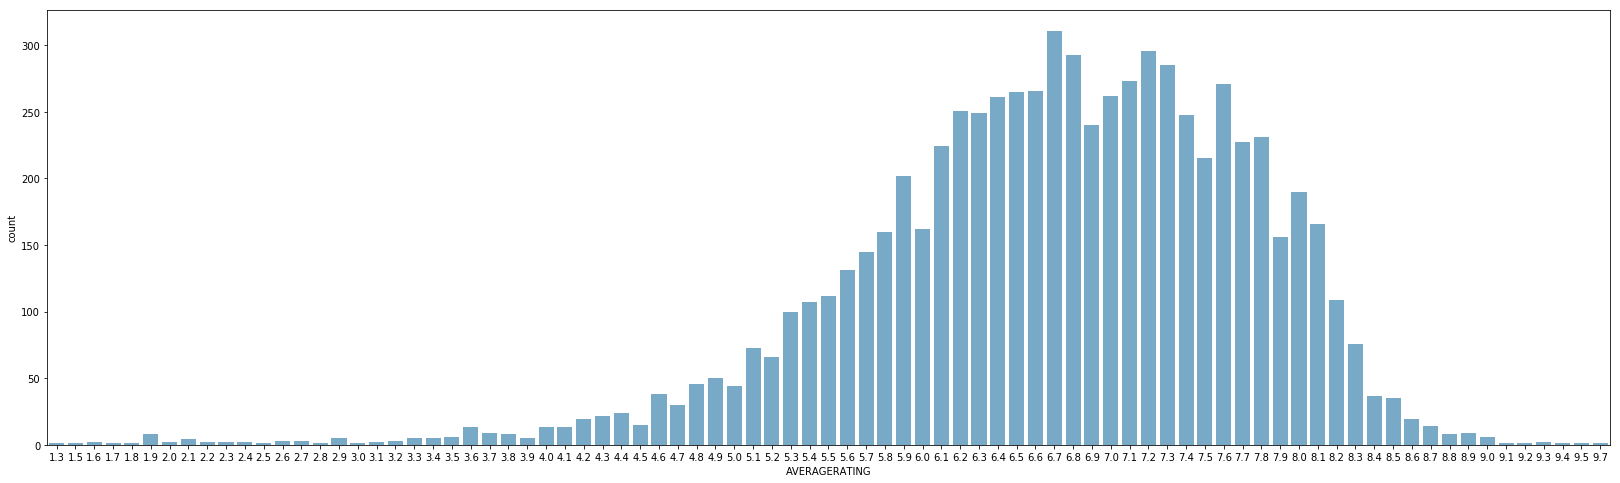

In [34]:
plt.figure(figsize=(28, 8))
sns.countplot(x="AVERAGERATING", data=df, palette=sns_palette);

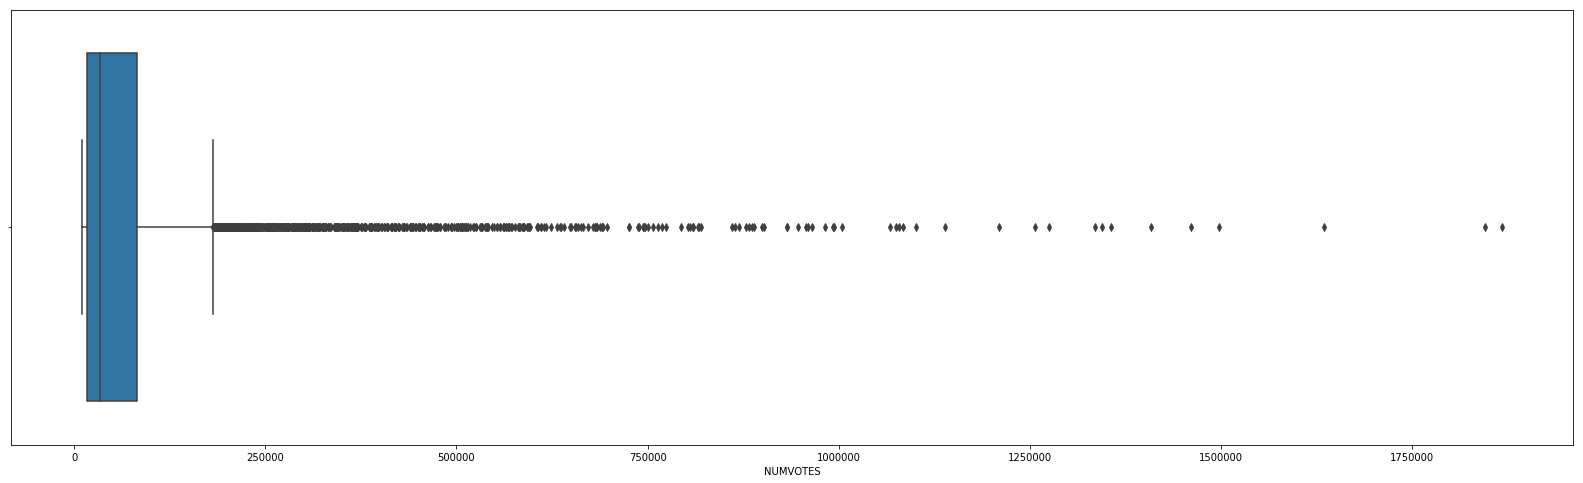

In [35]:
plt.figure(figsize=(28, 8))
sns.boxplot(df["NUMVOTES"]);

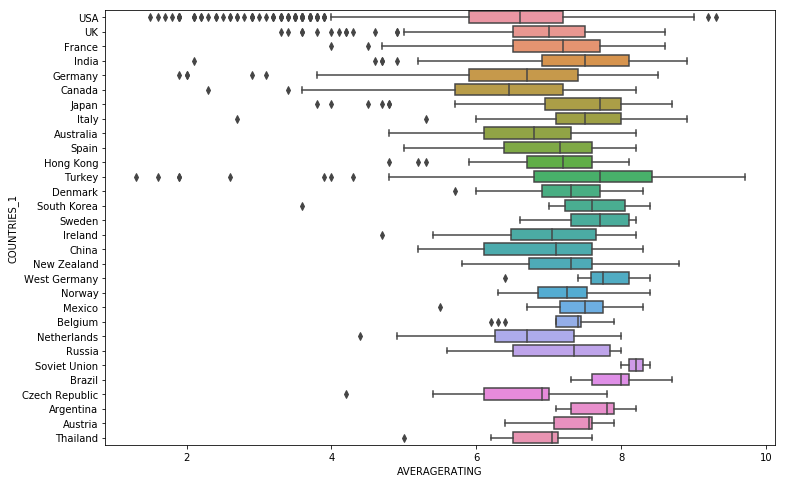

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="AVERAGERATING", y="COUNTRIES_1", data=df[df["COUNTRIES_1"].isin(df["COUNTRIES_1"].value_counts()[:30].index)], order=df["COUNTRIES_1"].value_counts().index[:30]);

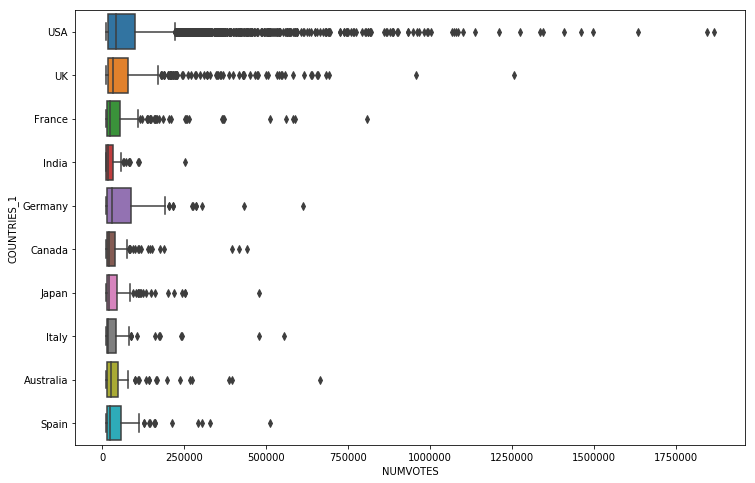

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="NUMVOTES", y="COUNTRIES_1", data=df[df["COUNTRIES_1"].isin(df["COUNTRIES_1"].value_counts()[:10].index)], order=df["COUNTRIES_1"].value_counts().index[:10]);

TypeError: must be str, not float

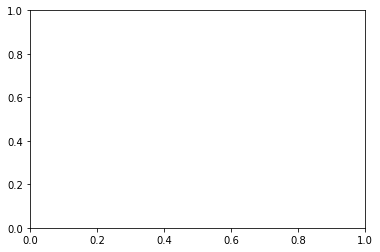

In [38]:
sns.distplot(df["DETAILS_BUDGET"], kde=False)

In [39]:
print(random.sample(df["DETAILS_BUDGET"].tolist(), 100))

['$15,000,000', '$17,500,000', '$2,500,000', '$70,000,000', nan, '$291,000', '$18,000,000', nan, '$1,500,000', '$6,000,000', '$1,232,000', '$22,000,000', nan, '$100,000,000', '$20,000,000', '$40,000,000', '$80,000,000', '$8,000,000', '$19,000,000', '$100,000', nan, '$20,000,000', '$3,000,000', '$150,000,000', nan, '$20,000,000', nan, '$20,000,000', 'HUF\xa0700,000,000', '$6,000,000', '$25,000,000', '$500,000', '$22,500,000', nan, '$13,000,000', '$125,000,000', '$25,000,000', '€1,000,000', '$11,000,000', '$50,000,000', nan, '$1,800,000', nan, '$29,000,000', '$20,000,000', '$18,000,000', '$90,000,000', '$52,000,000', '$9,000,000', nan, '$6,000,000', '$31,000,000', nan, nan, nan, nan, '$22,500,000', '$98,000,000', '$42,000,000', nan, '$18,000,000', '$13,500,000', nan, '$17,500,000', '$90,000', '$6,000,000', '$20,000,000', nan, nan, '$42,000,000', '$23,000,000', '$31,500,000', nan, '$70,000,000', '$13,000,000', 'DEM\xa06,000,000', '$150,000,000', '$90,000', '$40,000,000', '$16,500,000', '$

## Suppression des colonnes qui ont peu de contenu

In [40]:
counter_dimensions = Counter([item.split("_")[0] for item in df.columns])

In [41]:
counter_dimensions

Counter({'CRITICS': 2,
         'PRODUCTORS': 3,
         'COUNTRIES': 16,
         'DETAILS': 3,
         'LANG': 19,
         '': 3,
         'WRITER': 2,
         'DIRECTOR': 2,
         'STAR': 3,
         'AVERAGERATING': 1,
         'COMPOSER': 4,
         'IS': 28,
         'NUMVOTES': 1,
         'RUNTIMEMINUTES': 1,
         'AWARDS': 4,
         'OFFICIAL': 2})

In [42]:
df[pd.notnull(df["COUNTRIES_3"])].shape

(840, 94)

In [43]:
df[pd.notnull(df["LANG_3"])].shape

(1109, 94)

In [44]:
lang_col_to_delete = ["LANG_%d" %i for i in range(4, counter_dimensions["LANG"] + 1)]
countries_col_to_delete = ["COUNTRIES_%d" %i for i in range(4, counter_dimensions["COUNTRIES"] + 1)]

In [45]:
df = df.drop(lang_col_to_delete + countries_col_to_delete, axis=1)

In [46]:
df[pd.notnull(df["DIRECTOR_2"])].shape

(495, 65)

In [47]:
del df["DIRECTOR_2"]

In [48]:
df[pd.notnull(df["COMPOSER_2"])].shape

(175, 64)

In [49]:
del df["COMPOSER_2"]
del df["COMPOSER_3"]
del df["COMPOSER_4"]

# Préparation des données 

## Normalisation du budget et du box office

In [50]:
print(random.sample(df["DETAILS_BUDGET"].tolist(), 100))

[nan, '$25,000,000', '$225,000,000', '$17,000,000', '$29,000,000', '$17,000,000', '$55,000,000', '$75,000,000', 'JPY\xa03,000,000', nan, '$14,000,000', '$109,000,000', '$74,000,000', '$48,000,000', '$325,000', '$20,000,000', '$5,000,000', '$30,000,000', nan, '$20,000,000', '$110,000,000', '$50,000,000', nan, '$25,000,000', '€15,000,000', '$98,000,000', '$75,000,000', 'CAD\xa07,600,000', '$20,000,000', nan, nan, nan, '$10,000,000', '$6,000,000', '$1,500,000', '$70,000,000', '$12,000,000', '$35,000,000', nan, '$61,000,000', nan, '$200,000,000', '$10,000,000', '$10,000,000', nan, nan, '$160,000,000', '$3,500,000', '$25,000,000', '$175,000,000', '$48,000,000', '$12,000,000', nan, 'INR\xa0450,000,000', nan, '$14,000,000', nan, '$4,500,000', '$3,000,000', '$4,000,000', '$7,200,000', '$80,000,000', '$30,000,000', nan, nan, nan, '$20,000,000', '$45,000,000', '$7,500,000', nan, '$50,000,000', '$40,000,000', '$30,000,000', '$35,000,000', nan, '$40,000,000', 'CAD\xa02,200,000', '$7,000,000', '$40

In [51]:
print(random.sample(df["DETAILS_GROSS"].tolist(), 100))

[nan, '$14,919,570', nan, '$2,199,675', '$45,003,463', nan, '$49,823,057', '$32,669,555', '$48,911', '$4,905,000', '$20,966,644', '$126,477,084', '$39,568,996', nan, '$60,062,868', '$7,749,851', '$183,605', '$18,005,198', '$38,702,310', '$73,864,507', '$12,212,417', '$9,381,260', '$64,575,175', nan, '$241,438,208', nan, '$16,808,336', '$27,797,271', '$342,936', '$9,180,275', '$128,002,372', '$115,654,751', '$12,574,715', '$31,853,080', '$10,144,010', nan, '$126,373,434', '$120,146,040', '$7,179,298', '$316,694', '$2,040,920', '$8,460,995', '$180,202,163', '$33,987,757', '$111,866', '$623,809', '$105,489,203', '$16,298,046', nan, '$69,886', '$151,840', '$1,173,673', '$202,019,785', '$20,811,365', '$258,113', '$1,829,142', nan, '$19,719,930', nan, '$20,972,000', nan, '$42,432,803', '$25,754,284', '$66,486,205', '$95,011,339', '$97,403,112', '$17,451,873', '$130,319,208', '$10,100,000', nan, '$1,506,975', '$18,469', nan, nan, '$83,077,833', '$292,298,923', '$4,183,379', nan, '$1,260,917',

In [52]:
EUR_TO_USD = 1.17
GBP_TO_USD = 1.30
def extract_currency(amount):
    if pd.isnull(amount):
        return
    elif amount.startswith("$"):
        return int(amount[1:].replace(",", ""))
    elif amount.startswith("€"):
        return int(amount[1:].replace(",", "")) * EUR_TO_USD
    elif amount.startswith("£"):
        return int(amount[1:].replace(",", "")) * GBP_TO_USD

In [53]:
df["BUDGET_IN_USD"] = df["DETAILS_BUDGET"].apply(lambda x: extract_currency(x))
df["BOXOFFICE_US"] = df["DETAILS_GROSS"].apply(lambda x: extract_currency(x))

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


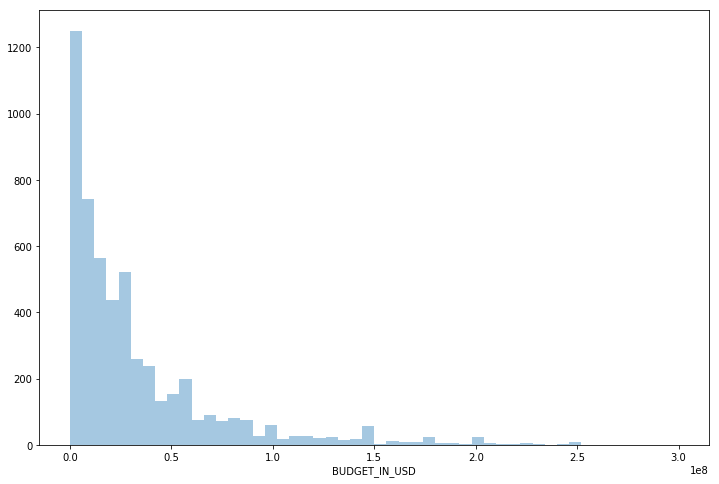

In [54]:
plt.figure(figsize=(12, 8))
sns.distplot(df[pd.notnull(df["BUDGET_IN_USD"])]["BUDGET_IN_USD"], kde=False);

## Normalisation critics 

In [55]:
print(random.sample(df["CRITICS_USER"].tolist(), 100))

['144', '120', '143', '363', '75', '191', '61', '116', '132', '164', '146', '161', '85', '145', '627', '52', '118', '119', '391', '155', '154', '218', '90', '133', '213', '233', '96', '159', '89', '133', '118', '232', '406', '117', '86', '151', '93', '130', '454', '33', '373', '524', '58', '118', '52', '326', '173', '232', '267', '498', '88', '118', '113', '204', '54', '31', '31', '722', '444', '523', '68', '136', '279', '763', '910', '39', '364', '287', '149', '417', '170', '85', '186', '85', '116', '361', '51', '304', '291', '109', '74', '209', '218', '1,122', '307', '78', '261', '138', '485', '58', '80', '431', '94', '248', '101', '415', '382', '184', '175', '114']


In [56]:
def normalize_critics(row):
    if pd.notnull(row["CRITICS_CRITIC"]):
        row["CRITICS_CRITIC"] = int(row["CRITICS_CRITIC"].replace(",", ""))
    if pd.notnull(row["CRITICS_USER"]):
        row["CRITICS_USER"] = int(row["CRITICS_USER"].replace(",", ""))
    return row

In [57]:
df = df.apply(lambda row: normalize_critics(row), axis=1)

## Normalisation donnée de communication 

In [58]:
df["OFFICIAL_SITES_1"].value_counts()

Facebook                                       1416
site                                            931
site [Japan]                                    229
site [France]                                    93
Site                                             87
site [Germany]                                   49
site [United States]                             45
site [Spain]                                     35
site [UK]                                        27
site [Russia]                                    24
Facebook Page                                    23
Blog                                             21
site [Australia]                                 19
site [Brazil]                                    15
Facebook [France]                                12
site [Netherlands]                                8
MySpace                                           8
site [Italy]                                      8
Facebook [United Kingdom]                         7
Facebook [Br

In [59]:
def normalize_site(row):
    row["COMMUNICATION_HAS_WEBSITE"] = 0
    row["COMMUNICATION_HAS_FACEBOOK"] = 0
    communication = str(row.get("OFFICIAL_SITES_1", "")) + " " + str(row.get("OFFICIAL_SITES_2", ""))
    communication = communication.lower().split(" ")
    if "site" in communication:
        row["COMMUNICATION_HAS_WEBSITE"] = 1
    if "facebook" in communication:
        row["COMMUNICATION_HAS_FACEBOOK"] = 1
    return row

In [60]:
df = df.apply(lambda row: normalize_site(row), axis=1)

In [61]:
df.head()

CRITICS_CRITIC  CRITICS_USER                      PRODUCTORS_1  \
tt0004972            84.0         334.0           David W. Griffith Corp.   
tt0006864            72.0          91.0         Triangle Film Corporation   
tt0010323           151.0         202.0                  Decla-Bioscop AG   
tt0012349            89.0         126.0       Charles Chaplin Productions   
tt0013442           244.0         371.0  Jofa-Atelier Berlin-Johannisthal   

                          PRODUCTORS_2 PRODUCTORS_3 COUNTRIES_1  \
tt0004972  Epoch Producing Corporation          NaN         USA   
tt0006864               Wark Producing          NaN         USA   
tt0010323                          NaN          NaN     Germany   
tt0012349                          NaN          NaN         USA   
tt0013442              Prana-Film GmbH          NaN     Germany   

                 DETAILS_RELEASE_DATE   LANG_1 LANG_2 LANG_3 DETAILS_BUDGET  \
tt0004972         21 March 1915 (USA)      NaN    NaN    NaN       $100,000   
tt0006864        12 May 1919 (France)      NaN    NaN    NaN       $385,907   
tt0010323  27 February 1920 (Germany)     None    NaN    NaN        $18,000   
tt0012349   9 November 1923 (Germany)  English    NaN    NaN       $250,000   
tt0013442           3 June 1929 (USA)   German    NaN    NaN            NaN   

          DETAILS_GROSS                                          _SYNOPSIS  \
tt0004972   $10,000,000  The Stoneman family finds its friendship with ...   
tt0006864           NaN  The story of a poor young woman, separated by ...   
tt0010323           NaN  Hypnotist Dr. Caligari uses a somnambulist, Ce...   
tt0012349    $5,450,000  The Tramp cares for an abandoned child, but ev...   
tt0013442           NaN  Vampire Count Orlok expresses interest in a ne...   

            WRITER_1 DIRECTOR_1     STAR_1     STAR_2     STAR_3  _METASCORE  \
tt0004972  nm0228746  nm0000428  nm0550615  nm0910400  nm0001273         NaN   
tt0006864  nm0000428  nm0000428  nm0550615  nm0001273  nm0001196         NaN   
tt0010323  nm0562346  nm0927468  nm0891998  nm0270415  nm0470328         NaN   
tt0012349  nm0000122  nm0000122  nm0701012  nm0001067  nm0000122         NaN   
tt0013442  nm0831290  nm0003638  nm0485146  nm0775659  nm0775180         NaN   

                                                  _STORYLINE  AVERAGERATING  \
tt0004972  \nTwo brothers, Phil and Ted Stoneman, visit t...            6.7   
tt0006864  \nIntolerance and its terrible effects are exa...            8.0   
tt0010323  \nFrancis, a young man, recalls in his memory ...            8.1   
tt0012349  \nThe opening title reads: "A comedy with a sm...            8.3   
tt0013442  \nWisbourg, Germany based estate agent Knock d...            8.0   

          COMPOSER_1  IS_ACTION  IS_ADULT  IS_ADVENTURE  IS_ANIMATION  \
tt0004972        NaN        NaN       NaN           NaN           NaN   
tt0006864        NaN        NaN       NaN           NaN           NaN   
tt0010323  nm0005959        NaN       NaN           NaN           NaN   
tt0012349        NaN        NaN       NaN           NaN           NaN   
tt0013442  nm0002302        NaN       NaN           NaN           NaN   

           IS_BIOGRAPHY  IS_COMEDY  IS_CRIME  IS_DOCUMENTARY  IS_DRAMA  \
tt0004972           NaN        NaN       NaN             NaN       1.0   
tt0006864           NaN        NaN       NaN             NaN       1.0   
tt0010323           NaN        NaN       NaN             NaN       NaN   
tt0012349           NaN        1.0       NaN             NaN       1.0   
tt0013442           NaN        NaN       NaN             NaN       NaN   

           IS_FAMILY  IS_FANTASY  IS_FILM-NOIR  IS_GAME-SHOW  IS_HISTORY  \
tt0004972        NaN         NaN           NaN           NaN         1.0   
tt0006864        NaN         NaN           NaN           NaN         1.0   
tt0010323        NaN         1.0           NaN           NaN         NaN   
tt0012349        1.0         NaN           NaN           

# Prédiction de la rentabilité

In [62]:
def is_profitable(row):
    if row["BOXOFFICE_US"] - row["BUDGET_IN_USD"] >= 0:
        return 1
    return 0

In [63]:
df_study = df[(pd.notnull(df["BOXOFFICE_US"])) & (pd.notnull(df["BUDGET_IN_USD"]))]

In [64]:
df_study.shape

(4749, 65)

In [65]:
df_study["class"] = df_study.apply(lambda row: is_profitable(row), axis=1)

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


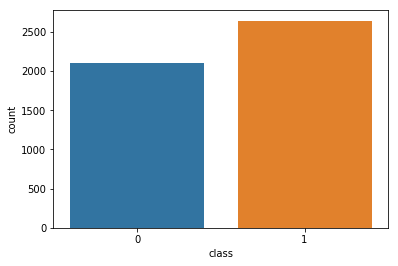

In [66]:
sns.countplot(df_study["class"]);

In [67]:
for col in df_study.columns:
    if df_study[pd.notnull(df_study[col])].shape[0] == 0:
        print(col)

IS_ADULT
IS_GAME-SHOW
IS_NEWS
IS_REALITY-TV
IS_SHORT
IS_TALK-SHOW


In [68]:
for col in df_study.columns:
    if df_study[pd.notnull(df_study[col])].shape[0] == 0:
        del df_study[col]

## Intuition

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


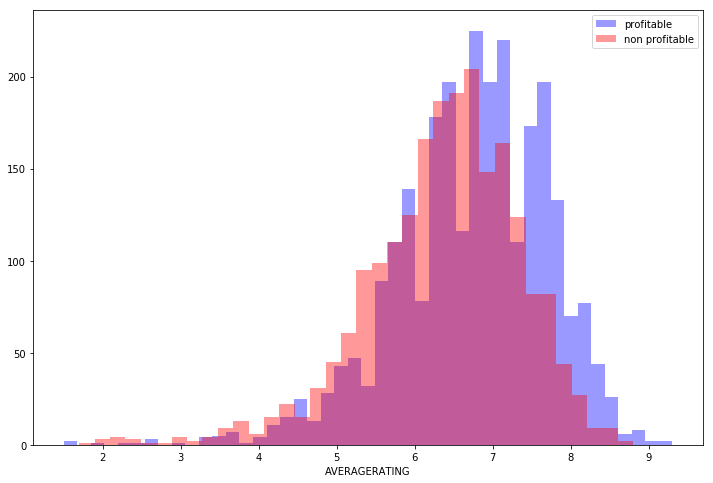

In [194]:
first_experiment = "AVERAGERATING"
plt.figure(figsize=(12, 8))
sns.distplot(a=df_study[df_study["class"] == 1][first_experiment], kde=False, color="blue", label="profitable")
sns.distplot(a=df_study[df_study["class"] == 0][first_experiment], kde=False, color="red", label="non profitable")
plt.legend();

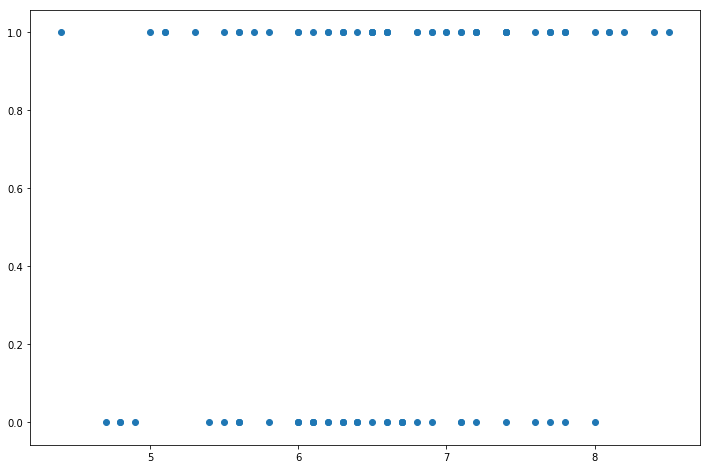

In [195]:
plt.figure(figsize=(12, 8))
df_study_sample = df_study.sample(100)
plt.scatter(df_study_sample[first_experiment], df_study_sample["class"]);

In [202]:
LinearR = LinearRegression()
LinearR = LinearR.fit(df_study_sample[[first_experiment]], np.array(df_study_sample["class"]))
y_preds = LinearR.predict(df_study_sample[[first_experiment]])

In [203]:
LinearR.coef_[0], LinearR.intercept_

(0.13522882708488224, -0.31021136869977994)

In [204]:
x_0 = - LinearR.intercept_ / LinearR.coef_[0]

In [205]:
x_0

2.2939736695716686

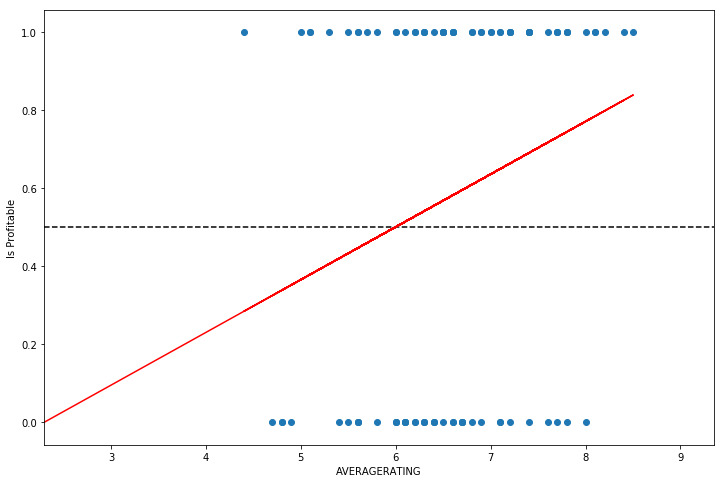

In [206]:
plt.figure(figsize=(12, 8))
plt.scatter(df_study_sample[first_experiment], df_study_sample["class"])
x = [x_0] + df_study_sample[first_experiment].tolist()
y_preds = [0] +  list(y_preds)
plt.plot(x, y_preds, color='red')
plt.xlabel(first_experiment)
plt.ylabel('Is Profitable')
plt.xlim(x_0, 1.1 * max(df_study_sample[first_experiment]))
plt.hlines(0.5, x_0, 1.1 * max(df_study_sample[first_experiment]), linestyles="dashed");

In [207]:
x_thr = (0.5 - LinearR.intercept_) / LinearR.coef_[0]

In [78]:
x_thr

6.160705546492659

si la note du film est supérieure à x_thr --> le film est rentable, sinon il ne l'est pas 

In [79]:
df_study["pred"] = df_study[first_experiment].apply(lambda x: 1 if x >= x_thr else 0)

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
print(classification_report(df_study["class"], df_study["pred"]))

              precision    recall  f1-score   support

           0       0.53      0.36      0.43      2108
           1       0.59      0.75      0.66      2641

   micro avg       0.57      0.57      0.57      4749
   macro avg       0.56      0.55      0.54      4749
weighted avg       0.57      0.57      0.56      4749



## Régression Logistique

In [81]:
def evaluate_model(cls, X, y):
    preds = cross_val_predict(cls, X, y)
    print(classification_report(y, preds))
    
    cls = cls.fit(X, y)
    return cls, preds

In [82]:
LR = LogisticRegression()

In [83]:
Y = np.array(df_study["class"])

In [84]:
movie_ids = list(df_study.index)

In [85]:
first_model, preds = evaluate_model(LogisticRegression(), df_study[[first_experiment]].as_matrix(), Y)

              precision    recall  f1-score   support

           0       0.53      0.27      0.35      2108
           1       0.58      0.81      0.68      2641

   micro avg       0.57      0.57      0.57      4749
   macro avg       0.56      0.54      0.52      4749
weighted avg       0.56      0.57      0.53      4749



/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

## Ajout d'une 2ème variable

In [86]:
df_profitable = df_study[df_study["class"] == 1]
df_non_profitable = df_study[df_study["class"] == 0]

In [87]:
other_col = "NUMVOTES"

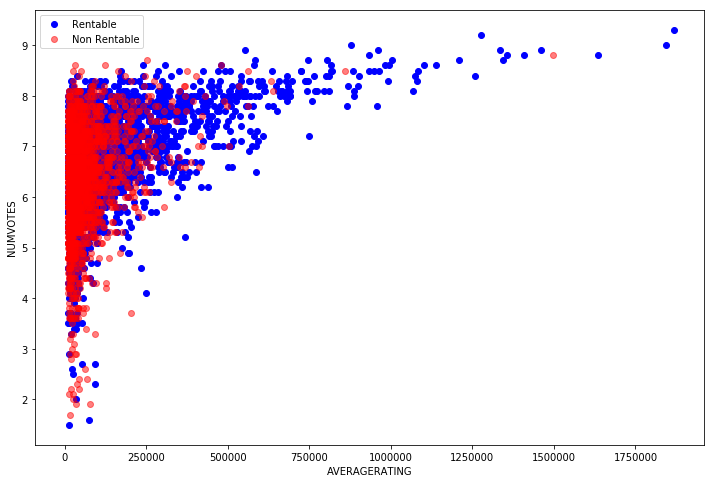

In [88]:
plt.figure(figsize=(12, 8))
plt.scatter(df_profitable[other_col], df_profitable[first_experiment], color="b", label="Rentable")
plt.scatter(df_non_profitable[other_col], df_non_profitable[first_experiment], color="r", label="Non Rentable", alpha=0.5)
plt.xlabel(first_experiment)
plt.ylabel(other_col)
plt.legend();

In [89]:
train_cols_v2 = [first_experiment, other_col]
second_model, preds = evaluate_model(LogisticRegression(), df_study[train_cols_v2].as_matrix(), Y)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2108
           1       0.56      1.00      0.71      2641

   micro avg       0.56      0.56      0.56      4749
   macro avg       0.28      0.50      0.36      4749
weighted avg       0.31      0.56      0.40      4749



/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

In [90]:
def plot_feature_coefs(coefs, feature_names, skip_first=0):
    plt.figure(figsize=(12, 8))
    order_ = np.flipud(np.argsort(coefs))
    imp = sorted(coefs, reverse=True)[skip_first:]
    tick_labels = np.array(feature_names)[order_][skip_first:]
    plt.barh(range(len(coefs) - skip_first), imp, tick_label=tick_labels, alpha=0.7)

In [91]:
dict(zip(train_cols_v2, second_model.coef_.ravel()))

{'AVERAGERATING': -7.294120791775988e-11, 'NUMVOTES': 4.174137251816184e-06}

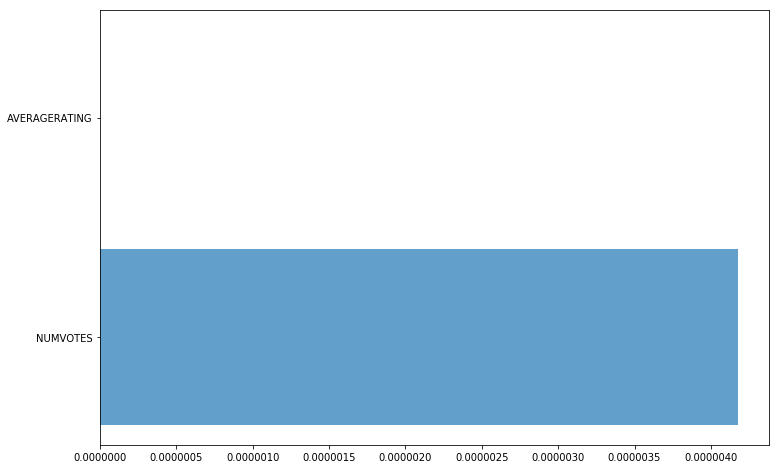

In [92]:
plot_feature_coefs(second_model.coef_.ravel(), train_cols_v2)

## Aujout d'autres variables

In [93]:
train_cols_v3 = [first_experiment, other_col, 'RUNTIMEMINUTES']

In [94]:
third_model, preds = evaluate_model(LogisticRegression(), df_study[train_cols_v3].fillna(0).as_matrix(), Y)

              precision    recall  f1-score   support

           0       0.55      0.62      0.59      2108
           1       0.67      0.60      0.63      2641

   micro avg       0.61      0.61      0.61      4749
   macro avg       0.61      0.61      0.61      4749
weighted avg       0.62      0.61      0.61      4749



/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

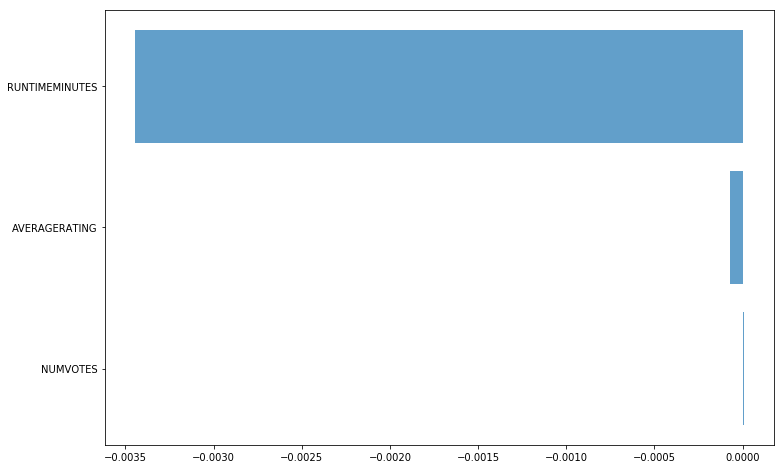

In [95]:
plot_feature_coefs(third_model.coef_.ravel(), train_cols_v3, skip_first=0)

In [96]:
dict(zip(train_cols_v3, list(third_model.coef_.ravel())))

{'AVERAGERATING': -6.999715608603386e-05,
 'NUMVOTES': 6.449812468135484e-06,
 'RUNTIMEMINUTES': -0.003445641954391631}

## Identification des mauvaises prédictions

In [97]:
def get_probas(cls, X):
    probas = cls.predict_proba(X)[:, 1]
    return probas

In [98]:
def get_misclassified_df(df, model, cols):
    df["proba_class_1"] = get_probas(model, df_study[cols].fillna(0).as_matrix())
    df["pred"] = df["proba_class_1"].apply(lambda x: 1 if x >= 0.5 else 0)
    df_fp = df[(df["pred"] == 1) & (df["class"] == 0)]
    df_fn = df[(df["pred"] == 0) & (df["class"] == 1)]
    return df_fp, df_fn

In [99]:
df_fp, df_fn = get_misclassified_df(df_study, third_model, train_cols_v3)

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
df_fp.shape

(725, 62)

In [101]:
df_fn.shape

(1088, 62)

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


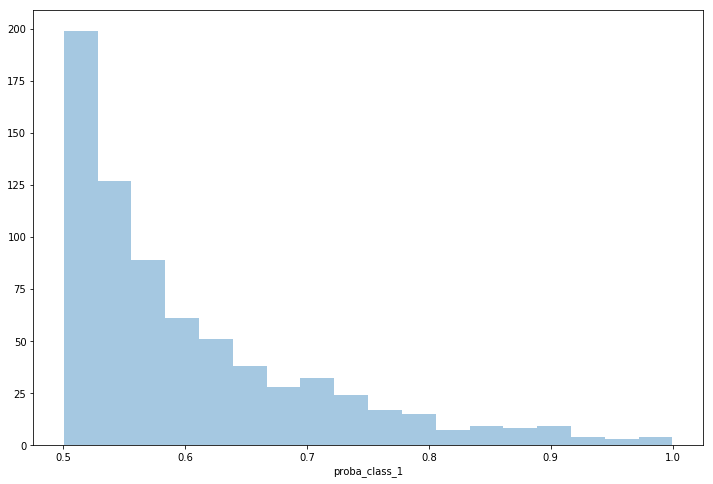

In [102]:
plt.figure(figsize=(12, 8))
sns.distplot(df_fp["proba_class_1"], kde=False);

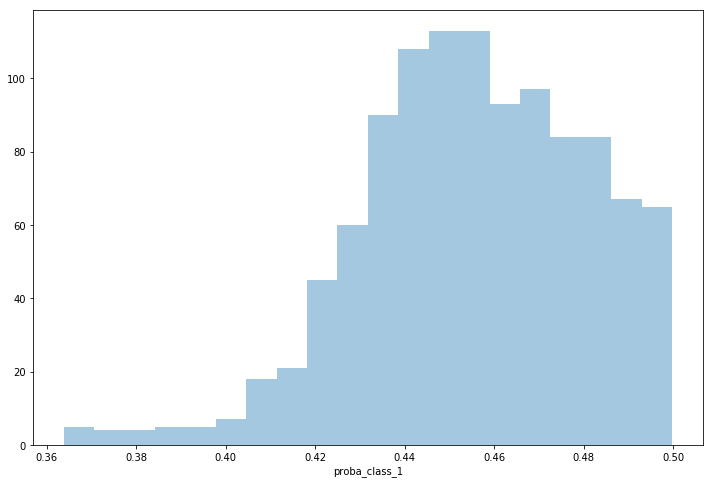

In [103]:
plt.figure(figsize=(12, 8))
sns.distplot(df_fn["proba_class_1"], kde=False);

In [104]:
def compare_distplot(study_column):
    plt.figure(figsize=(12, 8))
    sns.distplot(df_fp[study_column].fillna(0), color="red", kde=False, label="Faux positifs")
    sns.distplot(df_fn[study_column].fillna(0), color="blue", kde=False, label="Faux négatifs")
    plt.legend()

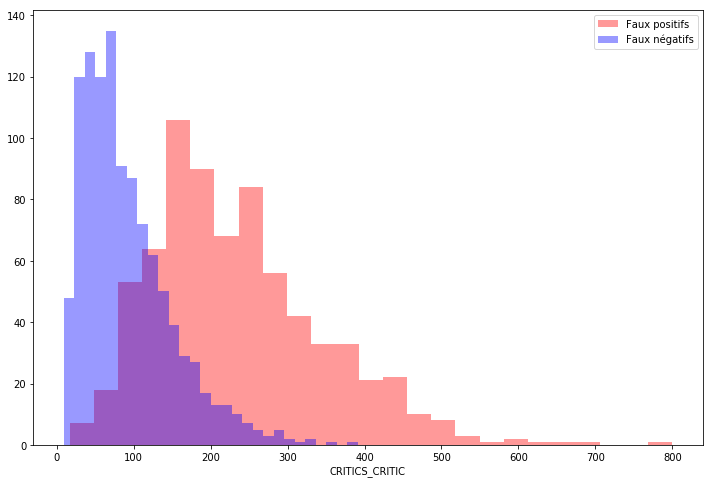

In [105]:
compare_distplot("CRITICS_CRITIC")

In [106]:
def evaluate_and_plot(df, cols, Y):
    new_model, new_preds = evaluate_model(LogisticRegression(), df[cols].fillna(0).as_matrix(), Y)
    plot_feature_coefs(new_model.coef_.ravel(), cols, skip_first=0)
    return new_model, new_preds

In [107]:
train_cols_v4 = train_cols_v3 + ["CRITICS_CRITIC"]

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

              precision    recall  f1-score   support

           0       0.55      0.73      0.63      2108
           1       0.71      0.53      0.60      2641

   micro avg       0.62      0.62      0.62      4749
   macro avg       0.63      0.63      0.62      4749
weighted avg       0.64      0.62      0.61      4749



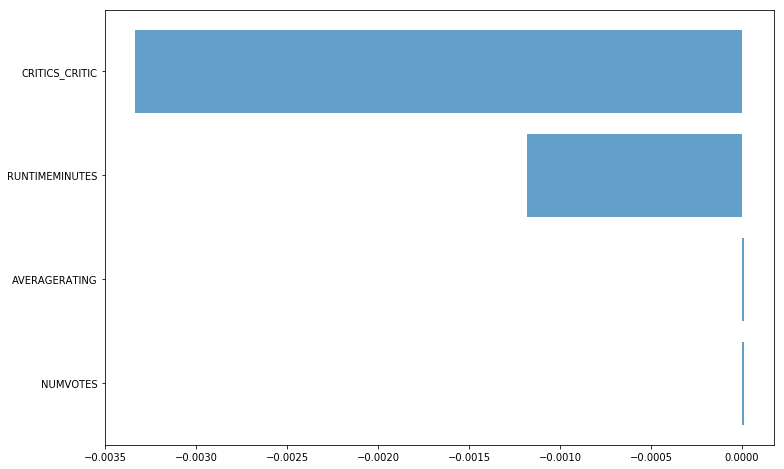

In [108]:
fourth_model, preds = evaluate_and_plot(df_study, train_cols_v4, Y)

In [109]:
df_fp, df_fn = get_misclassified_df(df_study, fourth_model, train_cols_v4)

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
df_fn.sample(100)

CRITICS_CRITIC  CRITICS_USER  \
tt3850214           189.0         104.0   
tt0022958            77.0         112.0   
tt3014666            50.0         135.0   
tt0097474           141.0         300.0   
tt0186894           106.0         163.0   
tt0105414            43.0          92.0   
tt0396752           127.0         183.0   
tt0095990            64.0         121.0   
tt1615147           294.0         233.0   
tt0087050           119.0         222.0   
tt2109184           254.0         255.0   
tt1990314           253.0          92.0   
tt0098663            32.0         103.0   
tt2309260           167.0         164.0   
tt3125324            68.0          39.0   
tt1082807           167.0         109.0   
tt0483726           111.0         239.0   
tt0040725           141.0         143.0   
tt0283026            83.0         220.0   
tt0115678            55.0          88.0   
tt4695012           254.0         432.0   
tt0094631            46.0          49.0   
tt0095270            38.0          61.0   
tt0093512            34.0          70.0   
tt1767382           217.0         159.0   
tt0089560            23.0          93.0   
tt2170593           258.0         189.0   
tt2318092            95.0          78.0   
tt2277860           532.0         362.0   
tt0082031            38.0         119.0   
...                   ...           ...   
tt0162650           159.0         306.0   
tt0097322            32.0          81.0   
tt0105121           135.0         151.0   
tt0004972            84.0         334.0   
tt0190641            66.0         265.0   
tt0306841            67.0         175.0   
tt0316465            76.0         201.0   
tt0063374            59.0         120.0   
tt5592248           283.0         152.0   
tt0087781            57.0         180.0   
tt3168230           294.0         193.0   
tt0099763           148.0         206.0   
tt1536044           268.0         363.0   
tt2702724           173.0         127.0   
tt2431286           337.0         242.0   
tt1385867           202.0         176.0   
tt0400497           117.0         172.0   
tt3401882           113.0         101.0   
tt0095348            29.0          56.0   
tt1778304           251.0         322.0   
tt0100114            40.0          97.0   
tt0057129           139.0         384.0   
tt0046303            79.0         263.0   
tt0844708           239.0         282.0   
tt1615065           339.0         275.0   
tt0117119            26.0          72.0   
tt0120524            74.0         157.0   
tt0468489           209.0         194.0   
tt1570989           113.0          37.0   
tt0083972           239.0         382.0   

                                        PRODUCTORS_1  \
tt3850214  Forest Whitaker's Significant Productions   
tt0022958                  Metro-Goldwyn-Mayer (MGM)   
tt3014666                               Affirm Films   
tt0097474                       Magnum Pictures Inc.   
tt0186894                                    Miramax   
tt0105414              Columbia Pictures Corporation   
tt0396752                         Universal Pictures   
tt0095990                 Lorimar Film Entertainment   
tt1615147                   Before The Door Pictures   
tt0087050                          Hal Roach Studios   
tt2109184                         Paramount Pictures   
tt1990314                           Dog Run Pictures   
tt0098663               Finnegan/Pinchuk Productions   
tt2309260                            New Line Cinema   
tt3125324       Black Entertainment Television (BET)   
tt1082807                                    BH Tilt   
tt0483726                         Universal Pictures   
tt0040725                               Archers, The   
tt0283026                      Twentieth Century Fox   
tt0115678                       Rysher Entertainment   
tt4695012                             Animal Kingdom   
tt0094631    American Entertainment Partners II L.P.   
tt0095270                            New Line Cinema   


In [85]:
df_fp.sample(100)

_METASCORE   WRITER_1                       PRODUCTORS_1  \
tt0163978        43.0  nm0388076                      Figment Films   
tt1464540        36.0  nm0587692                         DreamWorks   
tt1790886        50.0  nm0376260                       Warner Bros.   
tt0113749        41.0  nm0003620              Gramercy Pictures (I)   
tt2788710        52.0  nm0736622                  Columbia Pictures   
tt0111301         NaN  nm0211823               Capcom Entertainment   
tt1213644        15.0  nm0294997                          Lionsgate   
tt0120179        23.0  nm0003662             Blue Tulip Productions   
tt1959490        68.0  nm0359504                 Paramount Pictures   
tt0338751        77.0  nm0517589                       Forward Pass   
tt1267297        47.0  nm2952284                 Paramount Pictures   
tt0182789        42.0  nm0001920                      1492 Pictures   
tt0338526        35.0  nm0814085                 Universal Pictures   
tt0274166        51.0  nm0905498                 Universal Pictures   
tt0089881        96.0  nm0644823         Greenwich Film Productions   
tt0142688        44.0  nm0702416              Artisan Entertainment   
tt1628841        32.0  nm1288961              Twentieth Century Fox   
tt1815862        33.0  nm1729428                  Columbia Pictures   
tt0218922        33.0  nm0188165          Metro-Goldwyn-Mayer (MGM)   
tt0325703        43.0  nm1212988                 Paramount Pictures   
tt0242653        47.0  nm0905152                       Warner Bros.   
tt1194173        61.0  nm0319659                 Universal Pictures   
tt0406375        67.0  nm0885575      Columbia Pictures Corporation   
tt0042192         NaN  nm0000581              Twentieth Century Fox   
tt0088258        85.0  nm0001302                   Spinal Tap Prod.   
tt0114214        49.0  nm0601881                   TriStar Pictures   
tt0243585        66.0  nm0926824      Columbia Pictures Corporation   
tt0758774        57.0  nm2015758                       Warner Bros.   
tt0265087        32.0  nm0702912              Twentieth Century Fox   
tt0133240        60.0  nm0166256      Walt Disney Feature Animation   
...               ...        ...                                ...   
tt0137523        66.0  nm0657333                  Fox 2000 Pictures   
tt1606378        28.0  nm0861636              Twentieth Century Fox   
tt0955308        53.0  nm0001338                 Universal Pictures   
tt0405296        73.0  nm0001140  Warner Independent Pictures (WIP)   
tt0364569        74.0  nm1628380                          Egg Films   
tt1386703        43.0  nm0093560                       Total Recall   
tt1210819        37.0  nm1244808               Walt Disney Pictures   
tt1446714        65.0  nm3123612              Twentieth Century Fox   
tt0070379         NaN  nm0000217                       Warner Bros.   
tt0865556        57.0  nm0299301           Casey Silver Productions   
tt0108238         NaN  nm0380705      Columbia Pictures Corporation   
tt1211956        49.0  nm0445669               Summit Entertainment   
tt0092965        62.0  nm0001779               Amblin Entertainment   
tt0168629        61.0  nm0001885            Zentropa Entertainments   
tt0317648        54.0  nm0299301                Touchstone Pictures   
tt0404030        58.0  nm1583636  Warner Independent Pictures (WIP)   
tt0443649        34.0  nm0460057                       Warner Bros.   
tt1013743        46.0  nm0642277              Twentieth Century Fox   
tt0113845         NaN  nm0724514                  Columbia Pictures   
tt0107302        49.0  nm0506629      PolyGram Filmed Entertainment   
tt1045778        34.0  nm1969144                  Columbia Pictures   
tt0448134        64.0  nm0307497                          DNA Films   
tt0423977        54.0  nm1122978          Metro-Goldwyn-Mayer (MGM)   
tt0091203        24.0  nm0927074     Thorn EMI Screen Entertainment   
tt1458175        52.0  nm0353673   

## Calcul de nouvelles variables

### Extraction mois de sortie

In [111]:
months_list = ["january","february","march","april","may","june","july","august","september","october","november","december"]
month_to_idx = {}
for idx, month in enumerate(months_list):
    month_to_idx[month] = idx + 1

In [112]:
month_regex = re.compile("|".join(months_list))

In [113]:
month_regex.findall("21 October 2017 (Turkey)".lower())[0]

'october'

In [114]:
greedy_season_to_month = {
    "Winter": [1, 2, 3],
    "Spring": [4, 5, 6],
    "Summer": [7, 8, 9],
    "Automn": [10, 11, 12]
}
season_to_idx = {"Winter": 1, "Spring": 2, "Summer": 3, "Automn": 4}

In [115]:
def extract_from_release_date(row):
    if pd.notnull(row["DETAILS_RELEASE_DATE"]):
        month = month_regex.findall(row["DETAILS_RELEASE_DATE"].lower())
        if month:
            month_idx = month_to_idx[month[0]]
            row["RELEASE_DATE_MONTH"] = month_idx
            for season, months in greedy_season_to_month.items():
                if month_idx in months:
                    row["RELEASE_SEASON"] = season_to_idx[season]
                    break
    return row

In [116]:
df_study = df_study.apply(lambda row: extract_from_release_date(row), axis=1)

In [117]:
df_study.head()

AVERAGERATING  AWARDS_NB_OSCAR_NOMINATIONS  AWARDS_NB_OSCAR_WON  \
tt0004972            6.7                          NaN                  NaN   
tt0012349            8.3                          NaN                  NaN   
tt0015864            8.2                          2.0                  NaN   
tt0020629            8.1                          NaN                  2.0   
tt0021749            8.6                          NaN                  NaN   

           AWARDS_NB_OTHER_NOMINATIONS  AWARDS_NB_OTHER_WINS  BOXOFFICE_US  \
tt0004972                          NaN                   2.0    10000000.0   
tt0012349                          NaN                   1.0     5450000.0   
tt0015864                          1.0                   3.0     5450000.0   
tt0020629                          2.0                   5.0     3270000.0   
tt0021749                          NaN                   3.0       19181.0   

           BUDGET_IN_USD  COMMUNICATION_HAS_FACEBOOK  \
tt0004972       100000.0                           0   
tt0012349       250000.0                           0   
tt0015864       923000.0                           0   
tt0020629      1448864.0                           0   
tt0021749      1500000.0                           0   

           COMMUNICATION_HAS_WEBSITE COMPOSER_1 COUNTRIES_1 COUNTRIES_2  \
tt0004972                          0        NaN         USA         NaN   
tt0012349                          0        NaN         USA         NaN   
tt0015864                          0  nm0675356         USA         NaN   
tt0020629                          0        NaN         USA         NaN   
tt0021749                          0        NaN         USA         NaN   

          COUNTRIES_3  CRITICS_CRITIC  CRITICS_USER DETAILS_BUDGET  \
tt0004972         NaN            84.0         334.0       $100,000   
tt0012349         NaN            89.0         126.0       $250,000   
tt0015864         NaN           108.0         161.0       $923,000   
tt0020629         NaN            98.0         208.0     $1,448,864   
tt0021749         NaN           142.0         233.0     $1,500,000   

          DETAILS_GROSS       DETAILS_RELEASE_DATE DIRECTOR_1  IS_ACTION  \
tt0004972   $10,000,000        21 March 1915 (USA)  nm0000428        NaN   
tt0012349    $5,450,000  9 November 1923 (Germany)  nm0000122        NaN   
tt0015864    $5,450,000             1925 (Germany)  nm0000122        NaN   
tt0020629    $3,270,000  4 December 1930 (Germany)  nm0587277        NaN   
tt0021749       $19,181         7 March 1931 (USA)  nm0000122        NaN   

           IS_ADVENTURE  IS_ANIMATION  IS_BIOGRAPHY  IS_COMEDY  IS_CRIME  \
tt0004972           NaN           NaN           NaN        NaN       NaN   
tt0012349           NaN           NaN           NaN        1.0       NaN   
tt0015864           1.0           NaN           NaN        1.0       NaN   
tt0020629           NaN           NaN           NaN        NaN       NaN   
tt0021749           NaN           NaN           NaN        1.0       NaN   

           IS_DOCUMENTARY  IS_DRAMA  IS_FAMILY  IS_FANTASY  IS_FILM-NOIR  \
tt0004972             NaN       1.0        NaN         NaN           NaN   
tt0012349             NaN       1.0        1.0         NaN           NaN   
tt0015864             NaN       1.0        NaN         NaN           NaN   
tt0020629             NaN       1.0        NaN         NaN           NaN   
tt0021749             NaN       1.0        NaN         NaN           NaN   

           IS_HISTORY  IS_HORROR  IS_MUSIC  IS_MUSICAL  IS_MYSTERY  \
tt0004972         1.0        NaN       NaN         NaN         NaN   
tt0012349         NaN        NaN       NaN         NaN         NaN   
tt0015864         NaN        NaN       NaN         NaN         NaN   
tt0020629         NaN        NaN       NaN         NaN         NaN   
tt0021749         NaN        NaN       NaN         NaN         NaN   

           IS_ROMANCE  IS_SCI-FI  IS_SPORT  IS_THRILLER  IS_WAR  IS_WEST

In [118]:
df_fp, df_fn = get_misclassified_df(df_study, fourth_model, train_cols_v4)

In [119]:
df_fp.head()

AVERAGERATING  AWARDS_NB_OSCAR_NOMINATIONS  AWARDS_NB_OSCAR_WON  \
tt0021749            8.6                          NaN                  NaN   
tt0027977            8.5                          NaN                  NaN   
tt0035423            6.4                          1.0                  NaN   
tt0042192            8.3                          NaN                  6.0   
tt0043265            7.9                          NaN                  1.0   

           AWARDS_NB_OTHER_NOMINATIONS  AWARDS_NB_OTHER_WINS  BOXOFFICE_US  \
tt0021749                          NaN                   3.0       19181.0   
tt0027977                          1.0                   4.0      163245.0   
tt0035423                          4.0                   1.0    47121859.0   
tt0042192                         17.0                  17.0       10177.0   
tt0043265                          9.0                   2.0      536118.0   

           BUDGET_IN_USD  COMMUNICATION_HAS_FACEBOOK  \
tt0021749      1500000.0                           0   
tt0027977      1500000.0                           0   
tt0035423     48000000.0                           1   
tt0042192      1400000.0                           0   
tt0043265      1000000.0                           0   

           COMMUNICATION_HAS_WEBSITE COMPOSER_1 COUNTRIES_1 COUNTRIES_2  \
tt0021749                          0        NaN         USA         NaN   
tt0027977                          0        NaN         USA         NaN   
tt0035423                          0        NaN         USA         NaN   
tt0042192                          0        NaN         USA         NaN   
tt0043265                          0        NaN         USA          UK   

          COUNTRIES_3  CRITICS_CRITIC  CRITICS_USER DETAILS_BUDGET  \
tt0021749         NaN           142.0         233.0     $1,500,000   
tt0027977         NaN           126.0         230.0     $1,500,000   
tt0035423         NaN           123.0         325.0    $48,000,000   
tt0042192         NaN           122.0         332.0     $1,400,000   
tt0043265         NaN           116.0         223.0     $1,000,000   

          DETAILS_GROSS    DETAILS_RELEASE_DATE DIRECTOR_1  IS_ACTION  \
tt0021749       $19,181      7 March 1931 (USA)  nm0000122        NaN   
tt0027977      $163,245   11 February 1936 (UK)  nm0000122        NaN   
tt0035423   $47,121,859  25 December 2001 (USA)  nm0003506        NaN   
tt0042192       $10,177   27 October 1950 (USA)  nm0000581        NaN   
tt0043265      $536,118     21 March 1952 (USA)  nm0001379        NaN   

           IS_ADVENTURE  IS_ANIMATION  IS_BIOGRAPHY  IS_COMEDY  IS_CRIME  \
tt0021749           NaN           NaN           NaN        1.0       NaN   
tt0027977           NaN           NaN           NaN        1.0       NaN   
tt0035423           NaN           NaN           NaN        1.0       NaN   
tt0042192           NaN           NaN           NaN        NaN       NaN   
tt0043265           1.0           NaN           NaN        NaN       NaN   

           IS_DOCUMENTARY  IS_DRAMA  IS_FAMILY  IS_FANTASY  IS_FILM-NOIR  \
tt0021749             NaN       1.0        NaN         NaN           NaN   
tt0027977             NaN       1.0        1.0         NaN           NaN   
tt0035423             NaN       NaN        NaN         1.0           NaN   
tt0042192             NaN       1.0        NaN         NaN           NaN   
tt0043265             NaN       1.0        NaN         NaN           NaN   

           IS_HISTORY  IS_HORROR  IS_MUSIC  IS_MUSICAL  IS_MYSTERY  \
tt0021749         NaN        NaN       NaN         NaN         NaN   
tt0027977         NaN        NaN       NaN         NaN         NaN   
tt0035423         NaN        NaN       NaN         NaN         NaN   
tt0042192         NaN        NaN       NaN         NaN         NaN   
tt0043265         NaN        NaN       NaN         NaN         NaN   

           IS_ROMANCE  IS_SCI-FI  IS_SPORT  IS_THRILLER  IS_WAR  IS_WESTERN  \
tt0021749  

In [120]:
df_release = pd.DataFrame()

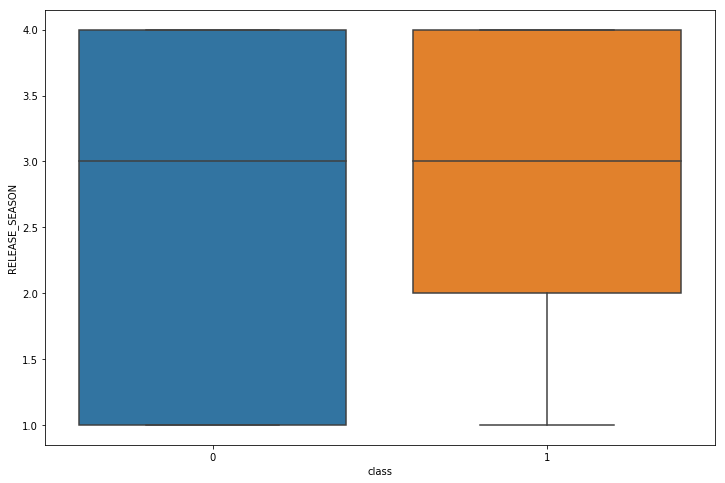

In [121]:
plt.figure(figsize=(12, 8))
sns.boxplot(y="RELEASE_SEASON", x="class", data=df_study);

In [123]:
df_fn["RELEASE_SEASON"].describe()

count    1079.000000
mean        2.475440
std         1.110374
min         1.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: RELEASE_SEASON, dtype: float64

In [124]:
df_fp["RELEASE_SEASON"].describe()

count    604.000000
mean       2.567881
std        1.179016
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: RELEASE_SEASON, dtype: float64

In [125]:
train_cols_v5 = train_cols_v4 + ["RELEASE_SEASON"]

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

              precision    recall  f1-score   support

           0       0.55      0.73      0.63      2108
           1       0.71      0.53      0.60      2641

   micro avg       0.62      0.62      0.62      4749
   macro avg       0.63      0.63      0.62      4749
weighted avg       0.64      0.62      0.61      4749



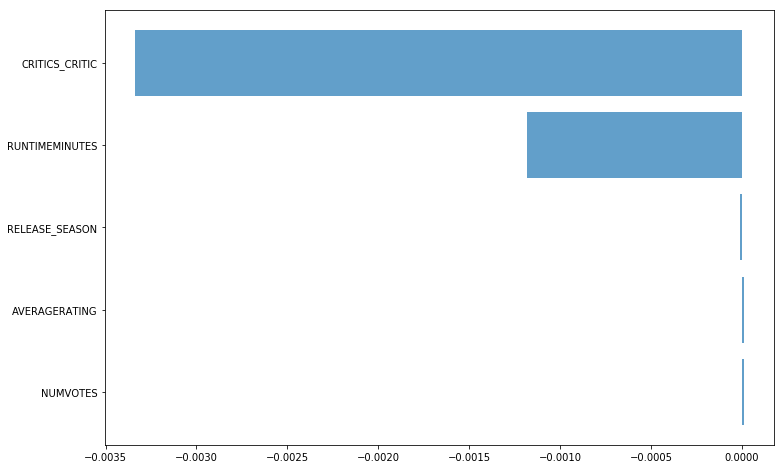

In [126]:
fifth_model, preds = evaluate_and_plot(df_study, train_cols_v5, Y)

In [127]:
train_cols_v6 = train_cols_v5 + ['BUDGET_IN_USD', 'AWARDS_NB_OSCAR_NOMINATIONS', 'AWARDS_NB_OSCAR_WON', 'AWARDS_NB_OTHER_NOMINATIONS', 'AWARDS_NB_OTHER_WINS']

/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      2108
           1       0.68      0.75      0.72      2641

   micro avg       0.67      0.67      0.67      4749
   macro avg       0.66      0.66      0.66      4749
weighted avg       0.67      0.67      0.66      4749



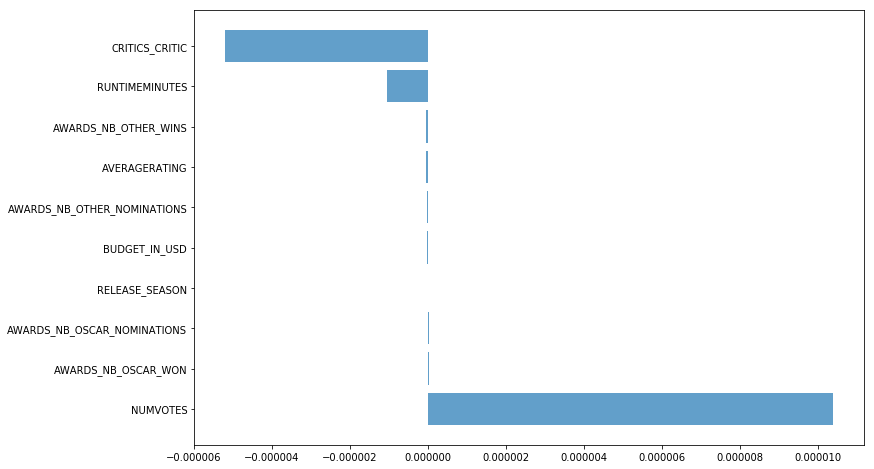

In [128]:
sixth_model, preds = evaluate_and_plot(df_study, train_cols_v6, Y)

## Avec un arbre de décision

In [129]:
def test_model(clf, df, cols, target_col, cv=5):
    prediction_data = df[cols]
    print(prediction_data.shape)
    prediction_data.fillna(0, inplace=True)
    prediction_target = np.array(df[target_col])
    preds = cross_val_predict(estimator=clf, X=prediction_data.as_matrix(), y=prediction_target, cv=cv)
    print(classification_report(prediction_target, preds))
    
    clf_trained = clf.fit(prediction_data.as_matrix(), prediction_target)
    return clf_trained

In [130]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=100, min_samples_leaf=100, presort=True)

In [131]:
DT_trained = test_model(DT, df=df_study, cols=train_cols_v6, target_col="class")

(4749, 10)
              precision    recall  f1-score   support

           0       0.59      0.53      0.56      2108
           1       0.65      0.71      0.68      2641

   micro avg       0.63      0.63      0.63      4749
   macro avg       0.62      0.62      0.62      4749
weighted avg       0.63      0.63      0.63      4749



/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [132]:
dict(zip(train_cols_v6, DT_trained.feature_importances_))

{'AVERAGERATING': 0.012462843088799554,
 'NUMVOTES': 0.4386289956999801,
 'RUNTIMEMINUTES': 0.02548339321158467,
 'CRITICS_CRITIC': 0.14945059789644483,
 'RELEASE_SEASON': 0.0,
 'BUDGET_IN_USD': 0.24635552887967235,
 'AWARDS_NB_OSCAR_NOMINATIONS': 0.0,
 'AWARDS_NB_OSCAR_WON': 0.02388812410165443,
 'AWARDS_NB_OTHER_NOMINATIONS': 0.033159045038776015,
 'AWARDS_NB_OTHER_WINS': 0.07057147208308802}

In [133]:
dot_ = export_graphviz(DT_trained, out_file=None, feature_names=train_cols_v6, filled=True, rounded=True,  
                         special_characters=True)

In [134]:
graph = graphviz.Source(dot_)

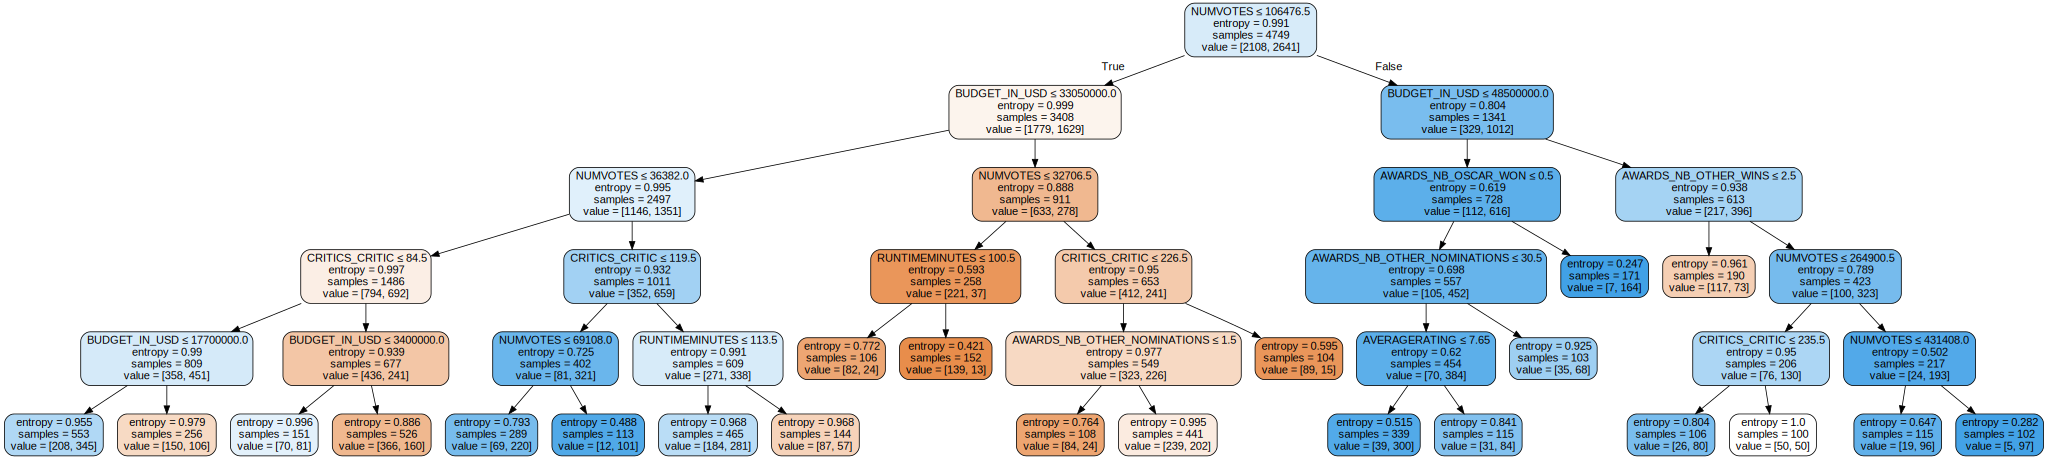

In [135]:
graph

In [136]:
dot_ = export_graphviz(DT_trained, out_file="Decision_tree_20171208.dot", feature_names=train_cols_v6, filled=True, rounded=True,  
                         special_characters=True)

# Textmining

In [137]:
tconst_to_synopsis = df["_SYNOPSIS"].to_dict()
tconst_to_storyline = df["_STORYLINE"].to_dict()

## Introduction à  spacy

In [138]:
import spacy
import en_core_web_lg

In [139]:
nlp_en = en_core_web_lg.load()

In [140]:
explore_object(tconst_to_synopsis)

('tt0449010',
 "In his homeland of Alagaesia, a farm boy happens upon a dragon's egg -- a discovery that leads him on a predestined journey where he realizes he's the one person who can defend his home against an evil king.")

In [141]:
def normalize_text(text):
    return text.replace("\n", " ").replace("\ufeff1", " ").strip()

In [142]:
doc = nlp_en(normalize_text(explore_object(tconst_to_synopsis)[1]))

In [143]:
doc

A homicide detective is pushed to the brink of his moral and physical limits as he tangles with a ferociously skilled hired killer who specializes in torture and pain.

In [144]:
for idx, token in enumerate(doc):
    print(idx, token.text, token.lemma_, token.tag_)

0 A a DT
1 homicide homicide NN
2 detective detective NN
3 is be VBZ
4 pushed push VBN
5 to to IN
6 the the DT
7 brink brink NN
8 of of IN
9 his -PRON- PRP$
10 moral moral JJ
11 and and CC
12 physical physical JJ
13 limits limit NNS
14 as as IN
15 he -PRON- PRP
16 tangles tangle VBZ
17 with with IN
18 a a DT
19 ferociously ferociously RB
20 skilled skilled JJ
21 hired hire VBN
22 killer killer NN
23 who who WP
24 specializes specialize VBZ
25 in in IN
26 torture torture NN
27 and and CC
28 pain pain NN
29 . . .


In [145]:
for idx, tok in enumerate(doc):
    print(idx, tok.text, tok.lemma_, "||", tok.pos_)

0 A a || DET
1 homicide homicide || NOUN
2 detective detective || NOUN
3 is be || VERB
4 pushed push || VERB
5 to to || ADP
6 the the || DET
7 brink brink || NOUN
8 of of || ADP
9 his -PRON- || ADJ
10 moral moral || ADJ
11 and and || CCONJ
12 physical physical || ADJ
13 limits limit || NOUN
14 as as || ADP
15 he -PRON- || PRON
16 tangles tangle || VERB
17 with with || ADP
18 a a || DET
19 ferociously ferociously || ADV
20 skilled skilled || ADJ
21 hired hire || VERB
22 killer killer || NOUN
23 who who || NOUN
24 specializes specialize || VERB
25 in in || ADP
26 torture torture || NOUN
27 and and || CCONJ
28 pain pain || NOUN
29 . . || PUNCT


PROPN : nom propre
CCONJ : conjonction de coordination
X : autre (type email, etc...)
SPACE : espace
PUNCT : ponctuation
PRON : Pronom
DET : déterminant
ADP : type conjonction 
PART : particule
NUM : Cardinal

In [146]:
exclude_tags = set(["PROPN", "CCONJ", "X", "SPACE", "PUNCT", "-PRON-", "DET", "ADP", "PART", "NUM"])

## Tokenization, lemmatization et construction du bag-of-words

In [147]:
MATRIX_TEXT_PREFIX = "TEXT_"
LEMMA_MIN_LENGTH = 3

In [148]:
def build_document_frequency(doc):
    lemma_to_count = defaultdict(int)
    for idx, token in enumerate(doc):
        if token.pos_ not in exclude_tags:
            if token.lemma_ == "-PRON-" or len(token.lemma_) < LEMMA_MIN_LENGTH:
                continue
            lemma_to_count[MATRIX_TEXT_PREFIX + token.lemma_] += 1
    return lemma_to_count

In [149]:
def build_corpus(list_of_texts):
    corpus = list()
    for text in tqdm(list_of_texts):
        if len(text):
            # Normalisation
            norm_text = normalize_text(text)
            # Tokenization & Lemmatization
            doc = nlp_en(norm_text)
            # Calcul des Occurences
            doc_frequency = build_document_frequency(doc)
            corpus.append(doc_frequency)
        else:
            corpus.append({})
    return corpus

In [150]:
corpus = build_corpus(df_study["_SYNOPSIS"])

100%|██████████| 4749/4749 [01:34<00:00, 50.31it/s]


### Chargement en matrice

In [151]:
text_vect = DictVectorizer()

In [152]:
tf_matrix = text_vect.fit_transform(corpus)

In [153]:
sum(tf_matrix[0,:].todense().A1)

13.0

In [154]:
tf_matrix.shape

(4749, 7361)

In [155]:
tf_matrix

<4749x7361 sparse matrix of type '<class 'numpy.float64'>'
	with 62124 stored elements in Compressed Sparse Row format>

In [156]:
# garder uniquement les features qui apparaissent sur au moins 2 documents
text_features_to_keep = np.where(tf_matrix.astype(np.bool).sum(axis=0).A1 > 1)[0]
tf_matrix = tf_matrix[:, text_features_to_keep]
text_vec_feature_names = np.array(text_vect.feature_names_)[text_features_to_keep]

In [157]:
tf_matrix.shape

(4749, 4335)

## Exploration de la matrice

In [158]:
def get_tag_cloud(matrix, star_id, crew_type, max_words=20, blacklist=[]):
    indices = set()
    for col in df_study.columns:
        if col.startswith(crew_type):
            idx_ = [df_study.index.get_loc(i) for i in df_study[df_study[col] == star_id].index.tolist()]
            indices = indices | set(idx_)
    print("FOUND %d movies" % len(indices))
    sub_matrix = matrix[list(indices),:].sum(axis=0).A1
    ordered_features_idx = np.flipud(np.argsort(sub_matrix))[:max_words]
    best_features = text_vec_feature_names[ordered_features_idx]
    best_features = [feature for feature in best_features if feature not in blacklist]
    return dict(zip(list(best_features), sub_matrix[ordered_features_idx])), [t.split("_")[1] for t in best_features]

In [159]:
tarantino = "nm0000233"

In [160]:
print(get_tag_cloud(tf_matrix, tarantino, "DIRECTOR", 30)[1])

FOUND 7 movies
['bounty', 'vengeance', 'middle', 'life', 'wife', 'team', 'find', 'hunter', 'quest', 'once', 'plantation', 'help', 'bandit', 'redemption', 'treacherous', 'character', 'who', 'cost', 'eyed', 'tale', 'reclusive', 'man', 'inhabit', 'shelter', 'will', 'informant', 'profit', 'brutal', 'part', 'winter']


In [161]:
nolan = "nm0634240"

In [162]:
print(get_tag_cloud(tf_matrix, nolan, "DIRECTOR", 40)[1]) #Christopher Nolan

FOUND 10 movies
['who', 'fight', 'thief', 'battle', 'have', 'exile', 'stage', 'set', 'must', 'task', 'local', 'havoc', 'meet', 'team', 'memory', 'mysterious', 'idea', 'people', 'technology', 'teen', 'dream', 'corruption', 'menace', 'train', 'chaos', 'murder', 'humanity', 'murderer', 'where', 'when', 'give', 'now', 'past', 'tragic', 'corporate', 'steal', 'mentor', 'obstacle', 'ensure', 'loss']


In [163]:
scorsese = "nm0000217"

In [164]:
print(get_tag_cloud(tf_matrix, scorsese, "DIRECTOR", 30)[1]) #Martin Scorsese

FOUND 22 movies
['life', 'year', 'who', 'attempt', 'young', 'woman', 'night', 'fast', 'other', 'late', 'save', 'tale', 'work', 'have', 'father', 'meet', 'aspire', 'singer', 'century', 'make', 'story', 'stalk', 'mafia', 'journey', 'mob', 'which', 'lawyer', 'show', 'good', 'taxi']


In [165]:
def get_genre_cloud(matrix, genre, max_words=20, blacklist=[]):
    indices = [df_study.index.get_loc(i) for i in df_study[df_study[genre] == 1].index.tolist()]
    sub_matrix = matrix[indices,:]
    feature_sum = sub_matrix.sum(axis=0).A1
    ordered_features_idx = np.flipud(np.argsort(feature_sum))[:max_words]
    best_features = text_vec_feature_names[ordered_features_idx]
    best_features = [feature for feature in best_features if feature not in blacklist]
    return dict(zip(list(best_features), feature_sum[ordered_features_idx])), [t.split("_")[1] for t in best_features]

In [166]:
print(get_genre_cloud(tf_matrix, "IS_DRAMA", max_words=100)[1])

['who', 'life', 'young', 'man', 'when', 'have', 'find', 'woman', 'family', 'become', 'story', 'that', 'love', 'take', 'friend', 'year', 'try', 'wife', 'girl', 'get', 'son', 'murder', 'help', 'father', 'fall', 'school', 'old', 'boy', 'new', 'work', 'world', 'not', 'daughter', 'where', 'must', 'force', 'high', 'discover', 'make', 'struggle', 'mother', 'turn', 'set', 'live', 'day', 'come', 'lead', 'american', 'brother', 'good', 'town', 'own', 'child', 'home', 'group', 'meet', 'only', 'drug', 'which', 'fight', 'other', 'relationship', 'attempt', 'small', 'will', 'begin', 'team', 'former', 'police', 'death', 'time', 'leave', 'student', 'order', 'war', 'mysterious', 'together', 'couple', 'people', 'first', 'way', 'husband', 'return', 'change', 'back', 'look', 'kill', 'travel', 'search', 'crime', 'secret', 'send', 'learn', 'city', 'save', 'job', 'base', 'sister', 'can', 'decide']


## Identification des stop words

In [167]:
(tf_matrix.astype(np.bool).sum(axis=0) > 100).A1

array([False, False, False, ..., False, False, False])

In [168]:
most_common_words = text_vec_feature_names[(tf_matrix.astype(np.bool).sum(axis=0) > 100).A1]

In [169]:
most_common_words

array(['TEXT_agent', 'TEXT_american', 'TEXT_attempt', 'TEXT_back',
       'TEXT_become', 'TEXT_begin', 'TEXT_boy', 'TEXT_brother',
       'TEXT_can', 'TEXT_child', 'TEXT_come', 'TEXT_couple',
       'TEXT_daughter', 'TEXT_day', 'TEXT_death', 'TEXT_discover',
       'TEXT_fall', 'TEXT_family', 'TEXT_father', 'TEXT_fight',
       'TEXT_find', 'TEXT_force', 'TEXT_former', 'TEXT_friend',
       'TEXT_get', 'TEXT_girl', 'TEXT_good', 'TEXT_group', 'TEXT_have',
       'TEXT_help', 'TEXT_high', 'TEXT_home', 'TEXT_kill', 'TEXT_killer',
       'TEXT_lead', 'TEXT_learn', 'TEXT_leave', 'TEXT_life', 'TEXT_live',
       'TEXT_look', 'TEXT_love', 'TEXT_make', 'TEXT_man', 'TEXT_meet',
       'TEXT_mother', 'TEXT_murder', 'TEXT_must', 'TEXT_mysterious',
       'TEXT_new', 'TEXT_not', 'TEXT_old', 'TEXT_only', 'TEXT_order',
       'TEXT_other', 'TEXT_own', 'TEXT_plan', 'TEXT_police',
       'TEXT_return', 'TEXT_save', 'TEXT_school', 'TEXT_secret',
       'TEXT_send', 'TEXT_set', 'TEXT_small', 'TEXT_son',

In [170]:
print(get_genre_cloud(tf_matrix, "IS_DRAMA", max_words=120, blacklist=most_common_words)[1])

['drug', 'relationship', 'people', 'first', 'husband', 'change', 'search', 'crime', 'city', 'job', 'base', 'sister', 'decide', 'college', 'journey', 'officer', 'know', 'start', 'parent', 'move', 'investigate', 'past', 'involve', 'escape', 'whose', 'local', 'lose', 'soldier', 'career', 'lover', 'true']


## Normalisation par TF IDF

In [171]:
tfidf = TfidfTransformer()

In [172]:
tfidf = tfidf.fit(tf_matrix)

In [173]:
tfidf_matrix = tfidf.transform(tf_matrix)

In [174]:
tfidf_matrix.shape

(4749, 4335)

### Différence de tag cloud

In [175]:
sorted(get_tag_cloud(tf_matrix, tarantino, "DIRECTOR", 20)[0].items(), key=lambda x: x[1], reverse=True)

FOUND 7 movies


[('TEXT_bounty', 2.0),
 ('TEXT_vengeance', 2.0),
 ('TEXT_middle', 2.0),
 ('TEXT_life', 2.0),
 ('TEXT_wife', 2.0),
 ('TEXT_team', 2.0),
 ('TEXT_find', 2.0),
 ('TEXT_hunter', 2.0),
 ('TEXT_quest', 1.0),
 ('TEXT_once', 1.0),
 ('TEXT_plantation', 1.0),
 ('TEXT_help', 1.0),
 ('TEXT_bandit', 1.0),
 ('TEXT_redemption', 1.0),
 ('TEXT_treacherous', 1.0),
 ('TEXT_character', 1.0),
 ('TEXT_who', 1.0),
 ('TEXT_cost', 1.0),
 ('TEXT_eyed', 1.0),
 ('TEXT_tale', 1.0)]

In [176]:
#now recalé loins derrière
sorted(get_tag_cloud(tfidf_matrix, tarantino, "DIRECTOR", 20)[0].items(), key=lambda x: x[1], reverse=True)

FOUND 7 movies


[('TEXT_vengeance', 0.6043606433086919),
 ('TEXT_bounty', 0.5881045179445936),
 ('TEXT_hunter', 0.5410940275283066),
 ('TEXT_middle', 0.5177597633554786),
 ('TEXT_wife', 0.40480902879717795),
 ('TEXT_bouncer', 0.39004459968874355),
 ('TEXT_eyed', 0.39004459968874355),
 ('TEXT_jewelry', 0.38645764302298574),
 ('TEXT_team', 0.3860863461888266),
 ('TEXT_plantation', 0.3790504573158699),
 ('TEXT_profit', 0.375245327595406),
 ('TEXT_terribly', 0.36706373953213706),
 ('TEXT_treacherous', 0.3662322503040429),
 ('TEXT_diner', 0.36250929566523005),
 ('TEXT_informant', 0.3596905196228643),
 ('TEXT_cost', 0.34305313211196736),
 ('TEXT_currently', 0.34127371058409034),
 ('TEXT_slave', 0.3408601240161048),
 ('TEXT_simple', 0.3380715055723786),
 ('TEXT_reclusive', 0.33392090555036863)]

# Nouvelles Prédictions 

In [177]:
from sklearn.svm import LinearSVC

In [178]:
svm = LinearSVC()

In [179]:
tfidf_matrix.shape

(4749, 4335)

In [180]:
Y.shape

(4749,)

In [181]:
svm, svm_predictions = evaluate_model(svm, tfidf_matrix, Y)

              precision    recall  f1-score   support

           0       0.46      0.43      0.45      2108
           1       0.57      0.60      0.58      2641

   micro avg       0.52      0.52      0.52      4749
   macro avg       0.51      0.51      0.51      4749
weighted avg       0.52      0.52      0.52      4749



/home/clement/dev/miniconda3/envs/movie-success-prediction/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [182]:
def interprete_prediction(movie_id):
    idx = movie_ids.index(movie_id)
    explanations = np.multiply(tfidf_matrix[idx,:].todense().A.ravel(), svm.coef_.T.ravel()).tolist()
    explanations = sorted(enumerate(explanations), key=lambda x: math.fabs(x[1]), reverse=True)[:20]
    return {text_vec_feature_names[item[0]]: item[1] for item in explanations if math.fabs(item[1] > 0)}

In [183]:
interprete_prediction("tt5013056") # Dunkerque

{'TEXT_allied': 0.3708620346051775,
 'TEXT_surround': 0.1398009409670126,
 'TEXT_evacuate': 0.13729706207831804,
 'TEXT_german': 0.06637118443886401,
 'TEXT_fierce': 0.05582932231560939}

In [184]:
svm_predictions[movie_ids.index("tt5013056")]

1

In [185]:
interprete_prediction("tt0407887") # Les inflitrés, avec DiCaprio, Jack Nicholson 

{'TEXT_undercover': 0.34374608136248896,
 'TEXT_identify': 0.2906892462847043,
 'TEXT_mole': 0.00149640047070148}

In [186]:
svm_predictions[movie_ids.index("tt0407887")]

0

In [187]:
corpus[movie_ids.index("tt0407887")]

defaultdict(int,
            {'TEXT_undercover': 1,
             'TEXT_cop': 1,
             'TEXT_mole': 1,
             'TEXT_police': 1,
             'TEXT_attempt': 1,
             'TEXT_identify': 1,
             'TEXT_other': 1,
             'TEXT_infiltrate': 1,
             'TEXT_irish': 1,
             'TEXT_gang': 1})

In [188]:
df_study.loc["tt0407887"]["class"]

1

In [189]:
sorted_coefs = sorted(enumerate(svm.coef_.ravel()), key=lambda x: x[1])
most_discriminant_negative_features = sorted_coefs[:30]
most_discriminant_positive_features = sorted_coefs[-30:]

In [190]:
feature_coefs = {text_vec_feature_names[item[0]]: item[1] for item in most_discriminant_negative_features}
feature_coefs.update({text_vec_feature_names[item[0]]: item[1] for item in most_discriminant_positive_features})

In [191]:
def plot_svm_feature_coefs(feature_dict):
    plt.figure(figsize=(20, 12))
    order_ = np.flipud(np.argsort(np.array(list(feature_dict.values()))))
    imp = sorted(list(feature_dict.values()), reverse=True)
    tick_labels = np.array(list(feature_dict.keys()))[order_]
    plt.barh(range(len(feature_dict)), imp, tick_label=tick_labels, alpha=0.7)

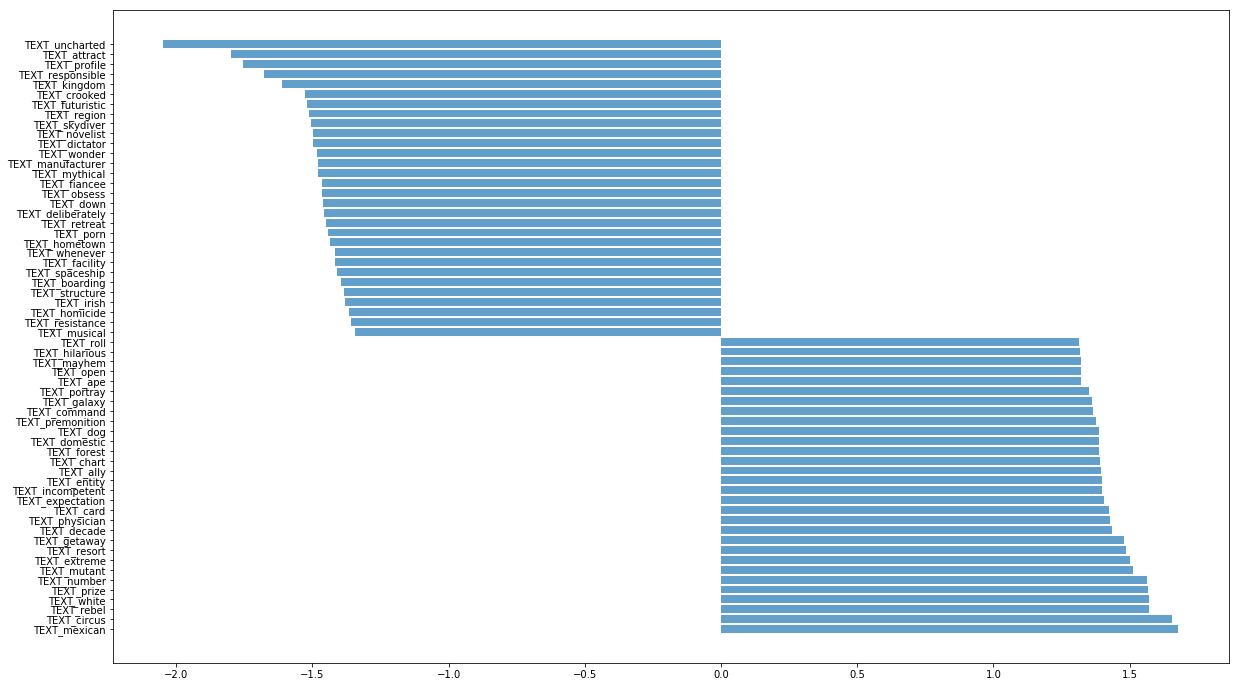

In [192]:
plot_svm_feature_coefs(feature_coefs)